In [ ]:
!pip install spectral 
!pip install rasterio

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# bibliotecas

from spectral import * 
import numpy as np 
import rasterio as rio
import matplotlib.pyplot as plt 

In [4]:
# Lendo imagem como array

src = rio.open('/content/drive/MyDrive/PDI - Python/PDI PYTHON/Arquivos/L71221071_07120010720_DN.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)

img = np.dstack([b1,b2,b3,b4,b5,b7])

In [5]:
#armazenando metadados 
meta = src.profile

In [12]:
# Rodando Classificador
(classif, centros) = kmeans(img, 8, 30)

spectral:INFO: k-means iteration 1 - 1824922 pixels reassigned.
spectral:INFO: k-means iteration 2 - 85936 pixels reassigned.
spectral:INFO: k-means iteration 3 - 67891 pixels reassigned.
spectral:INFO: k-means iteration 4 - 91854 pixels reassigned.
spectral:INFO: k-means iteration 5 - 93384 pixels reassigned.
spectral:INFO: k-means iteration 6 - 86530 pixels reassigned.
spectral:INFO: k-means iteration 7 - 80242 pixels reassigned.
spectral:INFO: k-means iteration 8 - 78014 pixels reassigned.
spectral:INFO: k-means iteration 9 - 81237 pixels reassigned.
spectral:INFO: k-means iteration 10 - 86213 pixels reassigned.
spectral:INFO: k-means iteration 11 - 90700 pixels reassigned.
spectral:INFO: k-means iteration 12 - 93519 pixels reassigned.
spectral:INFO: k-means iteration 13 - 95607 pixels reassigned.
spectral:INFO: k-means iteration 14 - 98818 pixels reassigned.
spectral:INFO: k-means iteration 15 - 101166 pixels reassigned.
spectral:INFO: k-means iteration 16 - 100052 pixels reassigne

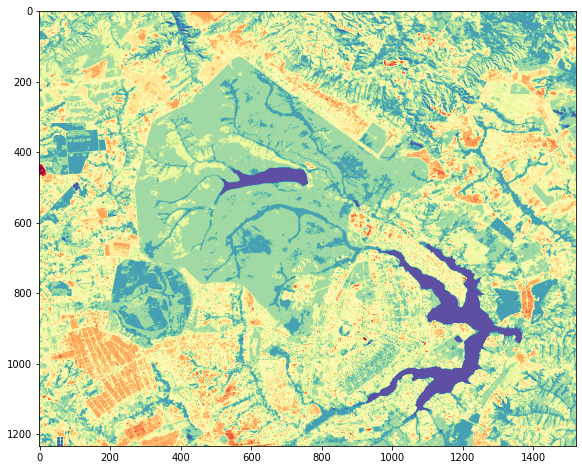

In [13]:
plt.imshow(classif, cmap = 'Spectral_r')

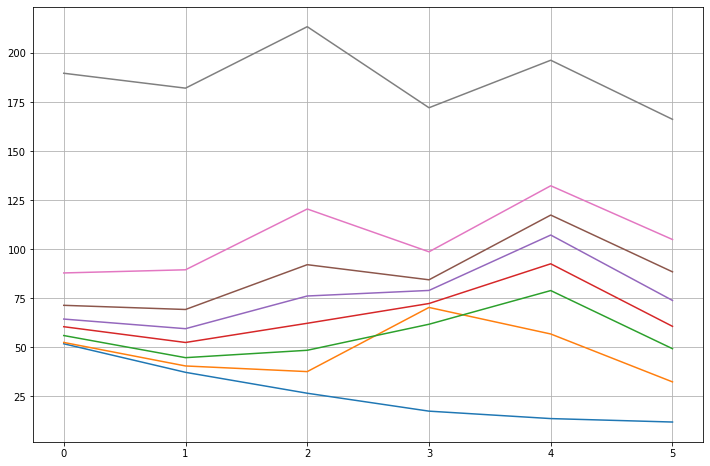

In [15]:
 # Visualizanddo centróides

plt.figure() 

for i in range(centros.shape[0]):
  plt.plot(centros[i])

plt.grid()

In [16]:
meta.update({'count':1})

In [19]:
# Salvando imagem em disco 

with rio.open('kmeans.tif','w', **meta) as src:
  src.write(classif,1)

In [20]:
# Abordagem scikit-learn
from sklearn import cluster 

In [21]:
# Criando matrix com bandas em colunas 
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [23]:
# Criando modelo
k_means = cluster.KMeans(n_clusters=8, max_iter=30)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img[:,:,0].shape)

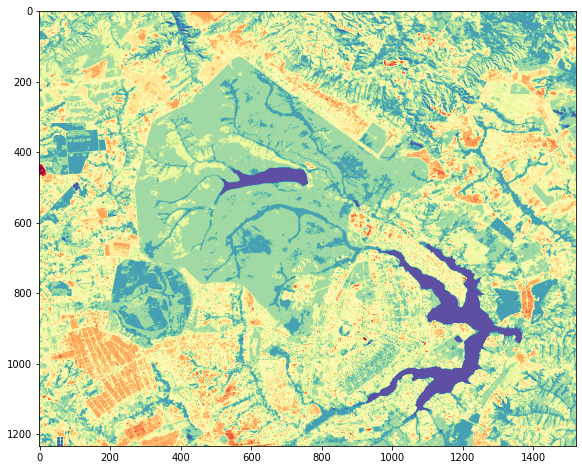

In [24]:
# Visualizando resultado 
plt.imshow(classif, cmap = 'Spectral_r')

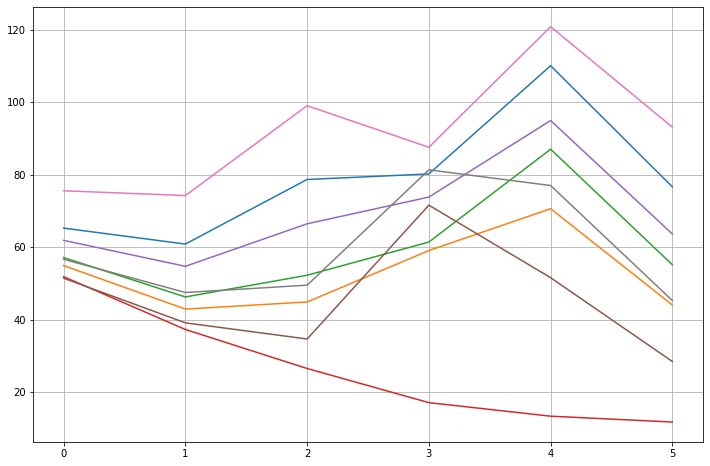

In [26]:
# Visualizando centróides 

cent = k_means.cluster_centers_

plt.figure() 

for i in range(cent.shape[0]):
  plt.plot(cent[i])

plt.grid()

In [27]:
 # Salvando imagem em disco 

with rio.open('kmeans2.tif','w', **meta) as src:
  src.write(classif,1)